# Entendimiento de datos

**Conjunto de datos:** _

**Nombre de archivo:** _

## 0. Inicialización

### 0.1. Perfilamiento de datos

Instalar ydata-profiling

In [1]:
!pip install ydata-profiling

Importaciones

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

import re
from tabulate import tabulate

Visualización de tablas y gráficas

In [ ]:
sns.set_style("darkgrid")

def print_table(df):
    print(tabulate(df, headers='keys', tablefmt='simple_outline'))

Lectura y muestra del archivo

In [ ]:
df =  pd.read_excel("")
df.head()

,Id,Fuente,Ciudad,Zona,Estrato,Lote Id,Tipo Inmueble,Nombre Contacto,Telefono Contacto,Precio Solicitado,Área,Piso,Garajes,Ascensores,Antiguedad (Años)
0,1116578,Ventana,Bogotá,EL PRADO,4.0,376895.0,Apartamento,Margarita,******44661,250000000,62,4,1.0,0.0,15.0
1,1117262,Ventana,Bogotá,EL PRADO,5.0,871551.0,apartamento,vendido,******35458,370000000,36,4,2.0,1.0,26.0
2,1229638,WEB,Bogotá,CIUDAD MONTES,3.0,754523.0,apartamento,Buen,******02547,170000000,33,12,0.0,2.0,2.0
3,1229641,WEB,Bogotá,CARVAJAL,3.0,863545.0,apartamento,Camilo,******36451,170000000,45,1,0.0,0.0,21.0
4,1229674,WEB,Bogotá,SUBA,3.0,502202.0,apartamento,Juan,******89955,320000000,75,16,1.0,2.0,6.0


**Hallazgos:** Cada fila corresponde a _

Información del archivo (Cantidad de filas, cantidad de columnas y tipos de dato)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9983 entries, 0 to 9982
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 9983 non-null   int64  
 1   Fuente             9983 non-null   object 
 2   Ciudad             9952 non-null   object 
 3   Zona               9950 non-null   object 
 4   Estrato            9959 non-null   float64
 5   Lote Id            9665 non-null   float64
 6   Tipo Inmueble      9972 non-null   object 
 7   Nombre Contacto    9961 non-null   object 
 8   Telefono Contacto  9983 non-null   object 
 9   Precio Solicitado  9983 non-null   int64  
 10  Área               9983 non-null   int64  
 11  Piso               9983 non-null   int64  
 12  Garajes            9920 non-null   float64
 13  Ascensores         9901 non-null   float64
 14  Antiguedad (Años)  9814 non-null   float64
dtypes: float64(5), int64(4), object(6)
memory usage: 1.1+ MB


Columnas agrupadas por tipo de dato

In [6]:
columnas_por_tipo = df.columns.to_series().groupby(df.dtypes).groups

print("Columnas agrupadas por tipo de dato:\n")
for tipo, cols in columnas_por_tipo.items():
    print(f"{tipo} ({len(cols)} columnas): {', '.join(cols)}")

Columnas agrupadas por tipo de dato:

int64 (4 columnas): Id, Precio Solicitado, Área, Piso
float64 (5 columnas): Estrato, Lote Id, Garajes, Ascensores, Antiguedad (Años)
object (6 columnas): Fuente, Ciudad, Zona, Tipo Inmueble, Nombre Contacto, Telefono Contacto


**Hallazgos:**
- Solamente por tipo de dato, hay _ variables categóricas (object) y _ variables numéricas (int64 y float64)
- _ en realidad son variables categóricas, por lo que tenemos:
    - **_ variables categóricas:** 
    - **_ variables numéricas:** 
- Hay tipos de dato que probablemente no corresponden a los valores posibles de las columnas, por lo que estos problemas deben ser abordados.

### 0.2. Cambios sobre las columnas

Verificamos si estas columnas pueden ser convertidas a int

In [7]:
for col in df.select_dtypes(include=["float"]).columns:
    puede_int = (df[col].dropna() % 1 == 0).all()
    print(f"{col}: {'se puede convertir a int' if puede_int else 'mantener como float'}")


Estrato: se puede convertir a int
Lote Id: se puede convertir a int
Garajes: se puede convertir a int
Ascensores: se puede convertir a int
Antiguedad (Años): se puede convertir a int


Como sí pueden serlo, ejecutamos el cambio

In [8]:
for col in df.select_dtypes(include=["float"]).columns:
    df[col] = df[col].astype("Int64")

## 1. Variables categóricas

Temporalmente, mapeamos las variables categóricas guardadas como número a texto

In [ ]:
cols_otra_categoria = []

for col in cols_otra_categoria:
    df[f"{col}_obj"] = df[col].astype("object")

Variables categóricas encontradas

In [10]:
non_numeric_attributes = df.select_dtypes(exclude=['number']).columns.values
pd.DataFrame(non_numeric_attributes, columns=['Non Numeric Attributes'])

,Non Numeric Attributes
0,Fuente
1,Ciudad
2,Zona
3,Tipo Inmueble
4,Nombre Contacto
5,Telefono Contacto
6,Id_obj
7,Estrato_obj
8,Lote Id_obj


Conteo de filas, cantidad de filas únicas, moda y su frecuencia

In [11]:
df[non_numeric_attributes].describe()

,Fuente,Ciudad,Zona,Tipo Inmueble,Nombre Contacto,Telefono Contacto,Id_obj,Estrato_obj,Lote Id_obj
count,9983,9952,9950,9972,9961,9983,9983,9959,9665
unique,2,3,98,3,2741,8619,9983,6,2139
top,Ventana,Bogotá,CALANDAIMA,apartamento,Juan,******12312,1419468,3,1179836
freq,5006,8368,633,9951,200,10,1,4822,54


**Hallazgos:**

- Hay , y la más común es

Conteos y porcentajes para cada valor único en las columnas. 

In [ ]:
for col in non_numeric_attributes:
    attribute = df[col].value_counts()
    df_attribute = pd.DataFrame({
        f"{col} values": attribute.index,
        'Count': attribute.values,
        'Percentage (%)': attribute.values * 100 / attribute.values.sum()
    }).sort_values(by='Count', ascending=False)

    print_table(df_attribute)

**Hallazgos:**

- 

Visualización de esta información con diagramas de conteos (diagramas de barras)

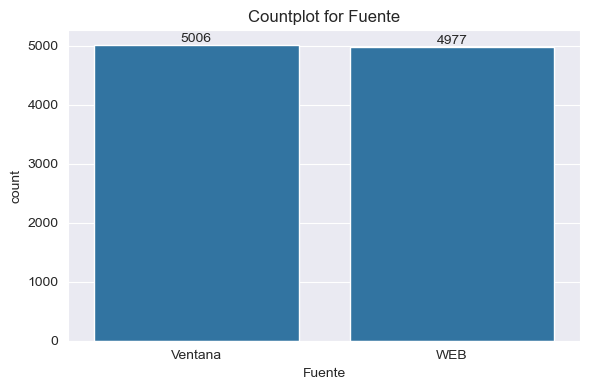

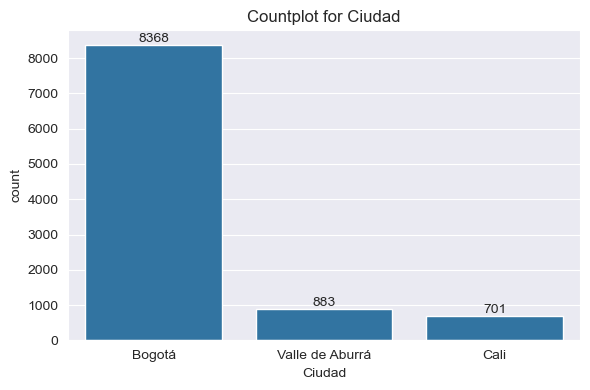

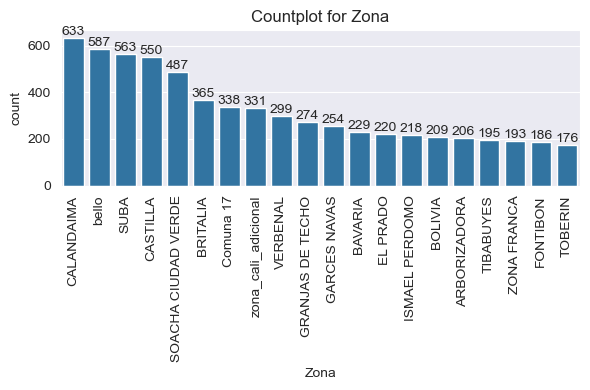

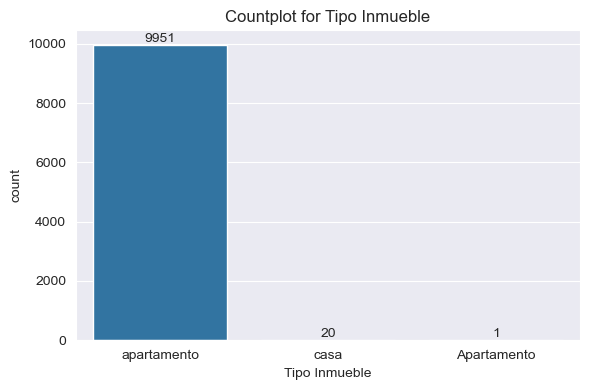

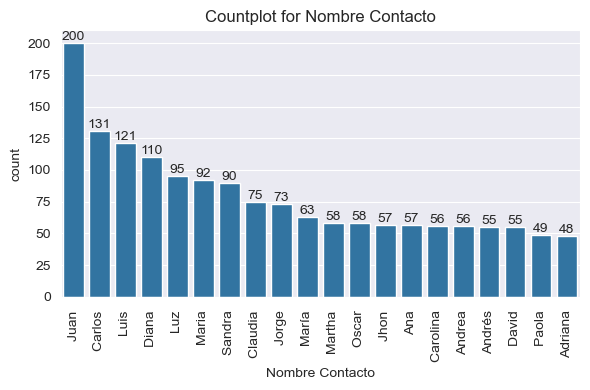

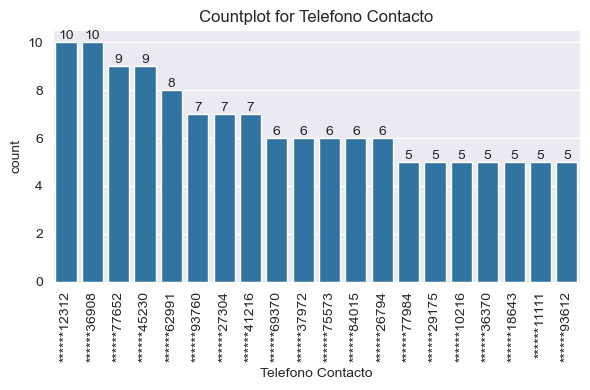

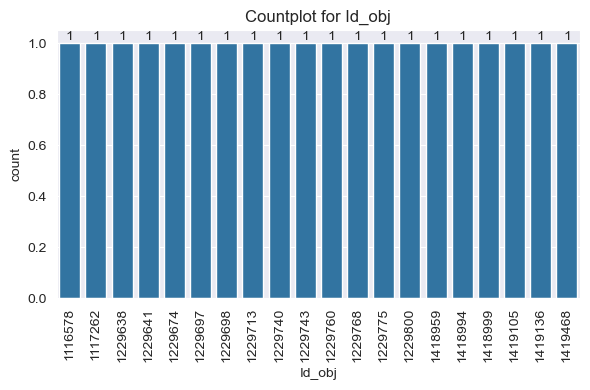

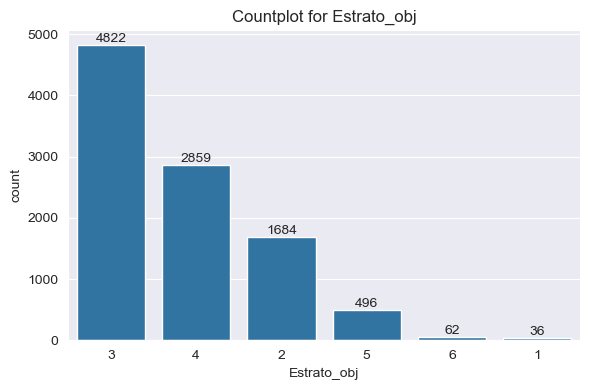

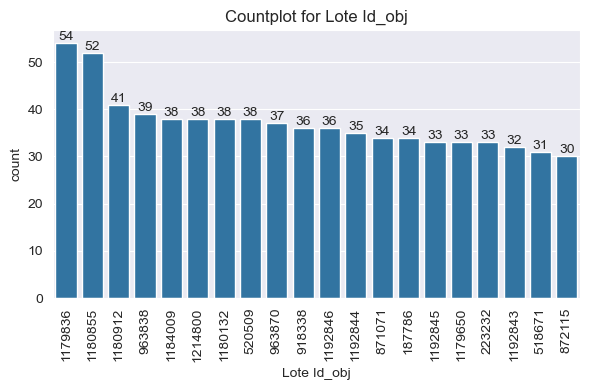

In [ ]:
for col in non_numeric_attributes:
    # Tomar los 20 valores más frecuentes
    top_values = df[col].value_counts().head(20).index
    df_top = df[df[col].isin(top_values)]

    plt.figure(figsize=(6, 4))
    # Ordenar por la frecuencia en el countplot
    ax = sns.countplot(
        data=df_top, 
        x=col, 
        order=df_top[col].value_counts().index
    )

    if col in []:
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    
    # Mostrar los valores encima de las barras
    ax.bar_label(ax.containers[0])

    plt.title(f"Countplot for {col}")
    plt.tight_layout()
    plt.show()


**Hallazgos adicionales:**

- 

Se eliminan las variables creadas

In [ ]:
df.drop(columns=[], inplace=True)

## 2. Variables numéricas

Variables numéricas encontradas

In [15]:
numeric_attributes = df.select_dtypes(include=['number']).columns.values
numeric_attributes = [col for col in numeric_attributes if col not in cols_otra_categoria]
pd.DataFrame(numeric_attributes, columns=['Numeric Attributes'])

,Numeric Attributes
0,Precio Solicitado
1,Área
2,Piso
3,Garajes
4,Ascensores
5,Antiguedad (Años)


Conteo de filas, promedio, desviación estándar, valores mínimo y máximo junto a los cuartiles

In [16]:
df[numeric_attributes].describe()

,Precio Solicitado,Área,Piso,Garajes,Ascensores,Antiguedad (Años)
count,9.983000e+03,9983.000000,9983.000000,9920.0,9901.0,9814.0
mean,2.217953e+08,60.636182,6.120605,0.522379,0.713059,13.572753
std,1.097838e+08,15.920600,24.845918,0.54118,0.736892,76.032397
min,1.200000e+02,1.000000,-3.000000,0.0,0.0,0.0
25%,1.450000e+08,50.000000,3.000000,0.0,0.0,5.0
50%,1.900000e+08,58.000000,4.000000,1.0,1.0,9.0
75%,2.800000e+08,68.000000,7.000000,1.0,1.0,15.0
max,1.800000e+09,300.000000,2204.000000,4.0,4.0,2021.0


**Hallazgos:**

- El _ varía entre _ y _
- El 75 % de _ tiene un _ o inferior a _
- No obstante, no tiene sentido _

Visualización de esta información con diagramas de caja

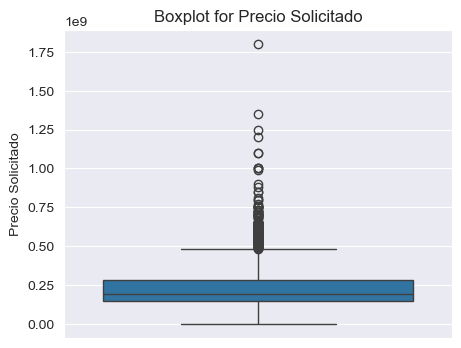

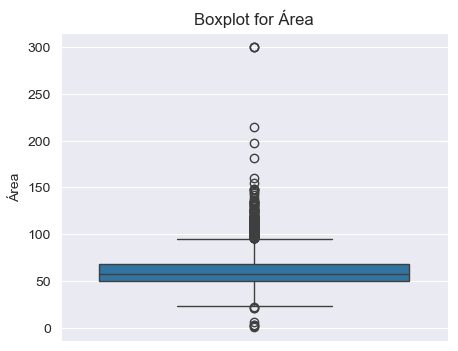

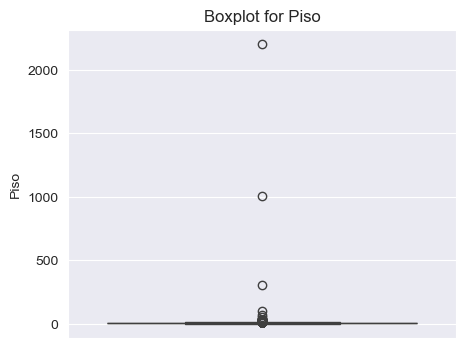

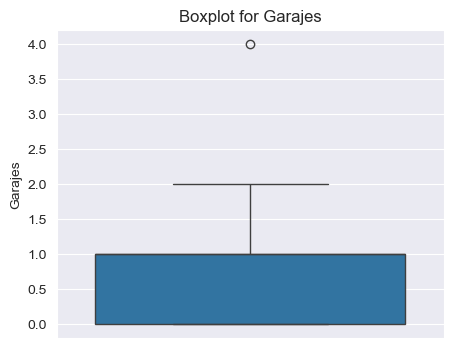

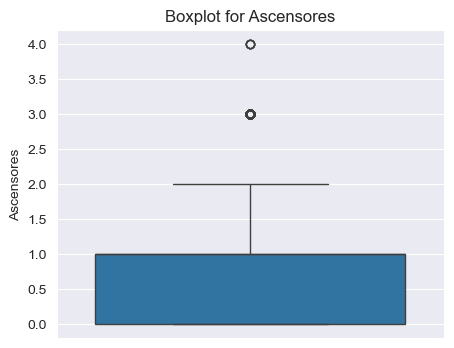

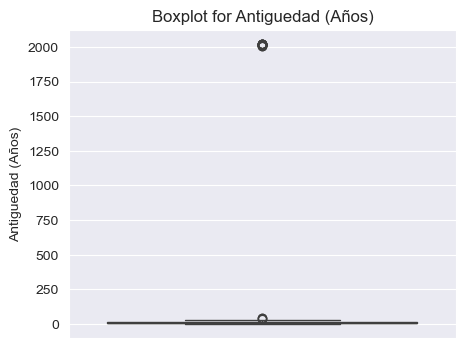

In [17]:
for col in numeric_attributes:
    plt.figure(figsize=(5,4))
    ax = sns.boxplot(data=df[col])
    ax.set_title(f"Boxplot for {col}")
    plt.xticks(rotation=45)
    plt.show()

**Hallazgos adicionales:**

- 

Histogramas para visualizar la distribución de cada columna

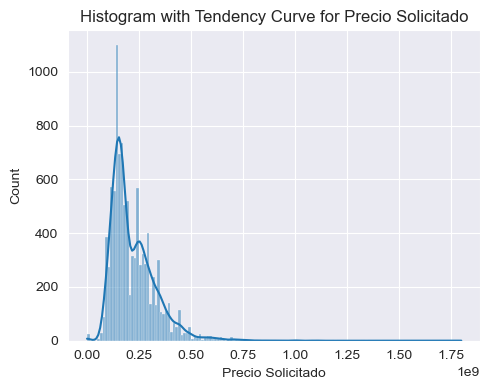

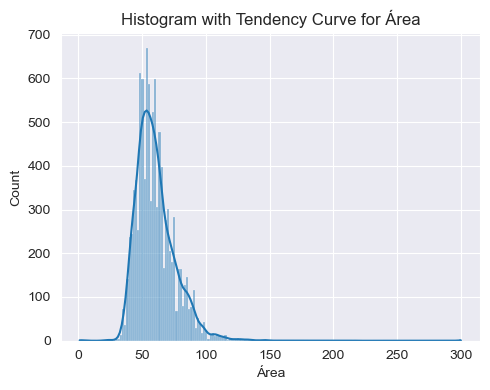

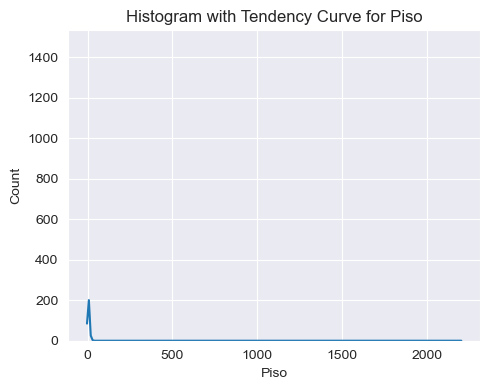

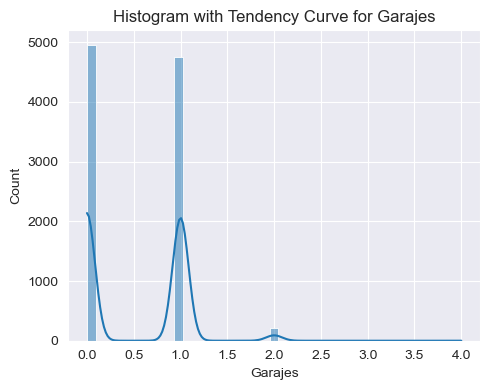

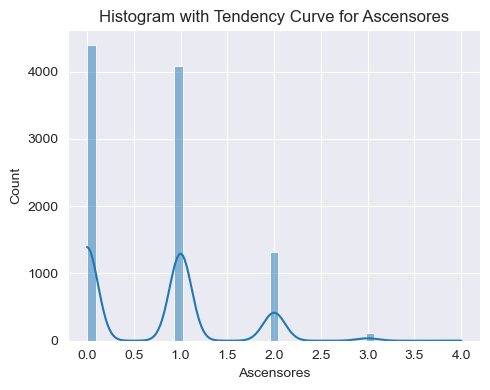

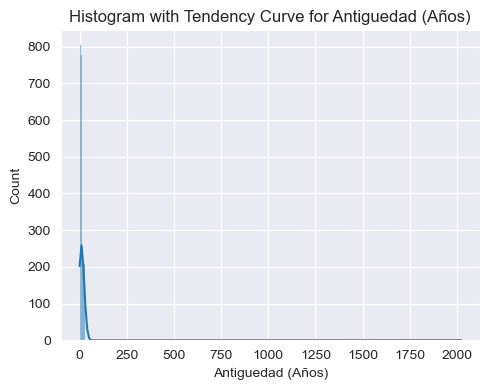

In [18]:
for col in df[numeric_attributes]:
    plt.figure(figsize=(5,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram with Tendency Curve for {col}")
    plt.tight_layout()
    plt.show()

**Hallazgos adicionales:**

- 

## 3. Calidad de datos

### 3.1. Completitud

**Resumen:** 

**Valores de nulos por columna:** Se cuentan los nulos para todas las columnas

In [19]:
incompleteness_percentages =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Attribute": incompleteness_percentages.index,
    "Completeness (%)": 100 - incompleteness_percentages.values
})

,Attribute,Completeness (%)
0,Lote Id,96.814585
1,Antiguedad (Años),98.307122
2,Ascensores,99.178604
3,Garajes,99.368927
4,Zona,99.669438
5,Ciudad,99.689472
6,Estrato,99.759591
7,Nombre Contacto,99.779625
8,Tipo Inmueble,99.889813
9,Id,100.000000


**Hallazgos:**

- 

**Valores de nulos por fila:** Se cuenta el número de columnas que cada fila tiene como nulo

In [20]:
df_result = df.copy()
df_result['Columnas faltantes'] = df_result.isna().sum(axis=1)
resumen = df_result['Columnas faltantes'].value_counts().sort_index().reset_index()
resumen.columns = ['Columnas faltantes', 'Número de ocurrencias']
resumen['Porcentaje (%)'] = (resumen['Número de ocurrencias'] / len(df_result) * 100).round(2)
resumen

,Columnas faltantes,Número de ocurrencias,Porcentaje (%)
0,0,9472,94.88
1,1,387,3.88
2,2,61,0.61
3,3,31,0.31
4,4,10,0.10
5,5,21,0.21
6,6,1,0.01


**Hallazgos:**

- 

**Valores inadecuados en las variables categóricas:** Gracias al perfilamiento de variables categóricas, se identifican los siguientes problemas de incompletitud más allá de los nulos. Ciertos problemas pueden presentarse en las mismas filas:



In [ ]:
df[df[''] == '']

,Id,Fuente,Ciudad,Zona,Estrato,Lote Id,Tipo Inmueble,Nombre Contacto,Telefono Contacto,Precio Solicitado,Área,Piso,Garajes,Ascensores,Antiguedad (Años)
2457,1271033,Ventana,Valle de Aburrá,NO FOUND,4,<NA>,apartamento,Jenny,******84015,430000000,99,4,1,1,<NA>


### 3.2. Unicidad

**Resumen:** 

Cantidad de filas duplicadas

In [25]:
total_duplicate_rows = df.duplicated().sum()
duplicate_rows_percentage = 100.0 * total_duplicate_rows / df.shape[0]
print(f"{total_duplicate_rows} duplicate rows ({duplicate_rows_percentage:.2f}%)")

0 duplicate rows (0.00%)


Cantidad de filas duplicadas sin considerar columna identificadora única `Id`

In [26]:
df_without_id = df.drop(columns=['Id'])
total_duplicate_rows = df_without_id.duplicated().sum()
duplicate_rows_percentage = 100.0 * total_duplicate_rows / df.shape[0]
print(f"{total_duplicate_rows} duplicate rows ({duplicate_rows_percentage:.2f}%)")

71 duplicate rows (0.71%)


**Hallazgos:**

- 

Cantidad de valores duplicados por cada columna

In [28]:
duplicate_counts = []
duplicate_percentages = []

for col in df.columns:
    duplicates = df.shape[0] - df[col].nunique()
    duplicate_counts.append(duplicates)
    duplicate_percentages.append((duplicates / df.shape[0]) * 100)

duplicates_df = pd.DataFrame({
    "Column": df.columns,
    "Duplicate Count": duplicate_counts,
    "Duplicate Percentage": duplicate_percentages
}).sort_values(by="Duplicate Count", ascending=False).reset_index(drop=True)

duplicates_df

,Column,Duplicate Count,Duplicate Percentage
0,Fuente,9981,99.979966
1,Ciudad,9980,99.969949
2,Tipo Inmueble,9980,99.969949
3,Garajes,9979,99.959932
4,Ascensores,9978,99.949915
5,Estrato,9977,99.939898
6,Piso,9945,99.619353
7,Antiguedad (Años),9941,99.579285
8,Zona,9885,99.018331
9,Área,9855,98.717820


**Hallazgos:**

- 

### 3.3. Consistencia

**Resumen:** 

**Consistencia de la presentación de variables categóricas:** Gracias al perfilamiento de variables categóricas, podemos evidenciar que algunas variables están escritas de forma inconsistente: algunas totalmente en mayúsculas, otras en minúsculas, otras con mayúscula inicial, entre otras variaciones. 

A continuación, se evidencian todos los tipos de capitalización en las variables mencionadas:

In [ ]:
def detect_casing(text: str) -> str:
    # extrae palabras con acentos y eñes
    words = re.findall(r"[A-Za-zÁÉÍÓÚÜÑáéíóúüñ]+", str(text))
    if not words:
        return "Other"

    # todas en mayúsculas
    if all(w.isupper() for w in words):
        return "UPPERCASE"

    # todas en minúsculas
    if all(w.islower() for w in words):
        return "lowercase"

    # todas Capitalized (primera letra mayúscula y resto minúsculas)
    if all(w[0].isupper() and w[1:].islower() for w in words):
        return "Capitalized"

    return "Other"


def casing_summary_df(df: pd.DataFrame) -> pd.DataFrame:
    text_columns = df.select_dtypes(include=["object", "string"]).columns
    results = {}
    other_examples = {}

    for col in text_columns:
        # Detect casing per value (sin dropna para mantener índices alineados)
        casing_series = df[col].apply(detect_casing)

        # Calculate percentages (acá sí se puede descartar nulos)
        casing_counts = casing_series.value_counts()
        casing_percent = (casing_counts / casing_counts.sum() * 100).round(2)
        results[col] = casing_percent

        # Capture up to 5 examples that fall into "Other"
        mask_other = casing_series == "Other"
        other_vals = df.loc[mask_other, col].dropna().unique()[:5]

        if len(other_vals) > 0:
            other_examples[col] = ", ".join(map(str, other_vals))
        else:
            other_examples[col] = "(Sin ejemplos)"

    # Build summary dataframe
    summary_df = pd.DataFrame(results).T.fillna(0)

    # Add the column with examples of 'Other'
    summary_df["Ejemplos Other"] = summary_df.index.map(lambda col: other_examples[col])

    return summary_df

print("Porcentajes de diferentes tipos de capitalización en variables categóricas:")
casing_summary_df(df)

Porcentajes de diferentes tipos de capitalización en variables categóricas:


,Capitalized,Other,UPPERCASE,lowercase
Fuente,50.15,0.00,49.85,0.00
Zona,3.72,0.00,84.09,12.19
Tipo Inmueble,0.01,0.00,0.00,99.99
Nombre Contacto,75.39,0.79,9.81,14.00


**Hallazgos:**

- 

**Consistencia a través de agrupaciones de características:** Se pueden explorar diferentes agrupaciones en búsqueda de inconsistencias

- **Inconsistencia entre estrato y precio:** Se agrupa por `Estrato` para validar el `Precio Solicitado`, evidenciando que los estratos 2, 3 y 4 tienen valores mínimos no acordes (120, 155 y 200 respectivamente). Esto corresponde con los outliers identificados anteriormente en `Precio Solicitado`

In [30]:
df.groupby("Estrato")["Precio Solicitado"].describe()


,count,mean,std,min,25%,50%,75%,max
Estrato,,,,,,,,
1,36.0,1.189306e+08,2.857525e+07,80000000.0,100000000.0,118000000.0,130000000.0,2.500000e+08
2,1684.0,1.363030e+08,3.105137e+07,120.0,120000000.0,135000000.0,150000000.0,3.350000e+08
3,4822.0,1.900837e+08,7.428438e+07,155.0,145000000.0,175000000.0,230000000.0,1.800000e+09
4,2859.0,2.938878e+08,1.003453e+08,200.0,230000000.0,280000000.0,350000000.0,8.500000e+08
5,496.0,3.796873e+08,1.553909e+08,67000000.0,270000000.0,340000000.0,460000000.0,1.350000e+09
6,62.0,4.628226e+08,1.940431e+08,190000000.0,330000000.0,425000000.0,575000000.0,1.100000e+09


- **Consistencia entre _:** Se agrupa por _, sin evidenciar relaciones anómalas

In [ ]:
print_table(df.groupby([]).size().reset_index(name="Count"))

### 3.4. Validez

**Resumen:** 

**Rangos y outliers:** Como se pudo ver en el perfilamiento de variables numéricas, hay problemas en el rango y los outliers de las siguientes columnas. Para tener más detalles, veamos los percentiles:

In [35]:
percentiles = df[numeric_attributes].quantile([0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0])
percentiles.index = [f"{int(p*100)}%" for p in percentiles.index]
percentiles

,Precio Solicitado,Área,Piso,Garajes,Ascensores,Antiguedad (Años)
0%,1.200000e+02,1.0,-3.0,0,0,0
1%,8.200000e+07,36.0,1.0,0,0,1
5%,1.000000e+08,41.0,1.0,0,0,2
10%,1.200000e+08,44.0,1.0,0,0,3
20%,1.400000e+08,48.0,2.0,0,0,5
30%,1.500000e+08,52.0,3.0,0,0,6
40%,1.700000e+08,55.0,4.0,0,0,7
50%,1.900000e+08,58.0,4.0,1,1,9
60%,2.300000e+08,61.0,5.0,1,1,11
70%,2.600000e+08,65.0,6.0,1,1,13


**Hallazgos:**

- 

Teniendo en cuenta el análisis de percentiles, el perfilamiento de variables numéricas y el contexto colombiano, se proponen los siguientes puntos de corte para identificar ítems inválidos.

- Los _ con ``  son inválidos

In [ ]:
df_menor_precio = df[df[''] < 1]
print(f": {len(df_menor_precio)} ({(len(df_menor_precio)/len(df))*100:.2f}%)")
df_menor_precio

Filas con precio menor a 1.000 COP: 13 (0.13%)


,Id,Fuente,Ciudad,Zona,Estrato,Lote Id,Tipo Inmueble,Nombre Contacto,Telefono Contacto,Precio Solicitado,Área,Piso,Garajes,Ascensores,Antiguedad (Años)
48,1230589,WEB,Bogotá,TIBABUYES,3,221121,apartamento,Gerardo,******88208,155,52,4,0,2,4
57,1230798,WEB,Bogotá,EL RINCON,3,963864,apartamento,hernando,******56665,234,66,8,1,2,2
118,1233270,WEB,Bogotá,SUBA,3,615396,apartamento,Mónica,******62792,240,73,5,1,0,12
123,1233376,WEB,Bogotá,LAS MARGARITAS,2,875817,apartamento,Maria,******56956,135,50,5,0,0,8
182,1234565,WEB,Bogotá,KENNEDY CENTRAL,3,788781,apartamento,Ines,******18676,180,64,3,0,0,27
188,1234637,WEB,Bogotá,SUBA,2,524175,apartamento,Patricia,******24136,190,49,4,0,1,10
200,1234830,WEB,Bogotá,EL RINCON,3,870859,apartamento,Óscar,******22332,180,54,4,0,0,23
229,1235223,WEB,Bogotá,ENGATIVA,2,349863,apartamento,"Sonia,",******76311,140,43,3,0,0,14
262,1235809,WEB,Bogotá,FONTIBON,3,864890,apartamento,Stella,******45543,220,59,4,1,0,25
286,1236187,WEB,Bogotá,BOSA OCCIDENTAL,2,171369,apartamento,Juan,******89150,120,49,4,0,1,7


## 4.  Análisis adicionales

Se puede efectuar un Pandas Profiling para encontrar más información

En especial, son de gran interés las correlaciones y las interacciones entre variables

In [ ]:
reporte = ProfileReport(df)
reporte.to_file("archivos_generados/Reporte perfilamiento - Dataset 2 Original.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 49.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Hallazgos:**

Valores faltantes:

- Un _% de las celdas están vacías

Características de las variables:

- 

Correlaciones:

-  está altamente correlacionado con `` (0.) y `` (0.)
